# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [8]:
# Read data into a dataframe and call info()
    # Example call:
    # df = pd.DataFrame({"A":[1, 2, 3], "B":[4, 5, 6]})
    # df.info()
import pandas as pd
import seaborn as sns
import requests

url = 'https://api.stockdata.org/v1/data/intraday?symbols=AAPL&api_token=L47p9xM4st5cOKz1e1RCKdK8MAzaOuNP9naJfylk'

response = requests.get(url)
response = response.json()
response

{'meta': {'date_from': '2024-12-06',
  'date_to': '2024-12-13',
  'max_period_days': 7},
 'data': [{'date': '2024-12-10T16:00:00.000Z',
   'ticker': 'AAPL',
   'data': {'open': 247.8,
    'high': 247.81,
    'low': 247.8,
    'close': 247.8,
    'volume': 533,
    'is_extended_hours': False}},
  {'date': '2024-12-10T15:59:00.000Z',
   'ticker': 'AAPL',
   'data': {'open': 247.64,
    'high': 247.81,
    'low': 247.55,
    'close': 247.79,
    'volume': 22709,
    'is_extended_hours': False}},
  {'date': '2024-12-10T15:58:00.000Z',
   'ticker': 'AAPL',
   'data': {'open': 247.65,
    'high': 247.67,
    'low': 247.59,
    'close': 247.63,
    'volume': 15994,
    'is_extended_hours': False}},
  {'date': '2024-12-10T15:57:00.000Z',
   'ticker': 'AAPL',
   'data': {'open': 247.71,
    'high': 247.73,
    'low': 247.64,
    'close': 247.64,
    'volume': 9458,
    'is_extended_hours': False}},
  {'date': '2024-12-10T15:56:00.000Z',
   'ticker': 'AAPL',
   'data': {'open': 247.66,
    'high

In [14]:
my_data = {
    "date": [],
    "ticker": [],
    "high": [],
    "low": [],
    "close": [],
    "volume": [],
    "is_extended_hours": []
}

In [16]:
for i in range(0, len(response['data'])):
    my_data["date"].append(response['data'][i]['date'])
    my_data["ticker"].append(response['data'][i]['ticker'])
    my_data["high"].append(response['data'][i]['data']['high'])
    my_data["low"].append(response['data'][i]['data']['low'])
    my_data["close"].append(response['data'][i]['data']['close'])
    my_data["volume"].append(response['data'][i]['data']['volume'])
    my_data["is_extended_hours"].append(response['data'][i]['data']['is_extended_hours'])

In [17]:
df = pd.DataFrame(my_data)
df.head()

,date,ticker,high,low,close,volume,is_extended_hours
0,2024-12-10T16:00:00.000Z,AAPL,247.81,247.80,247.80,533,False
1,2024-12-10T15:59:00.000Z,AAPL,247.81,247.55,247.79,22709,False
2,2024-12-10T15:58:00.000Z,AAPL,247.67,247.59,247.63,15994,False
3,2024-12-10T15:57:00.000Z,AAPL,247.73,247.64,247.64,9458,False
4,2024-12-10T15:56:00.000Z,AAPL,247.76,247.65,247.73,4164,False


# My Question

### What sort of relationship does volume have with closing stock prices? how is this data affected if extended hours were true?

# My Analysis

<AxesSubplot:xlabel='close', ylabel='volume'>

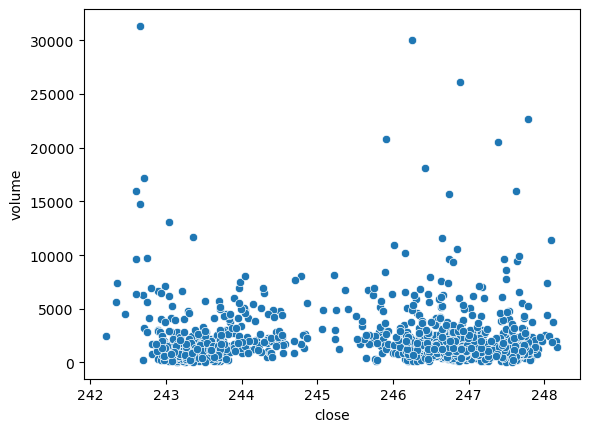

In [18]:
sns.scatterplot(x='close', y='volume', data=df)

<AxesSubplot:xlabel='close', ylabel='volume'>

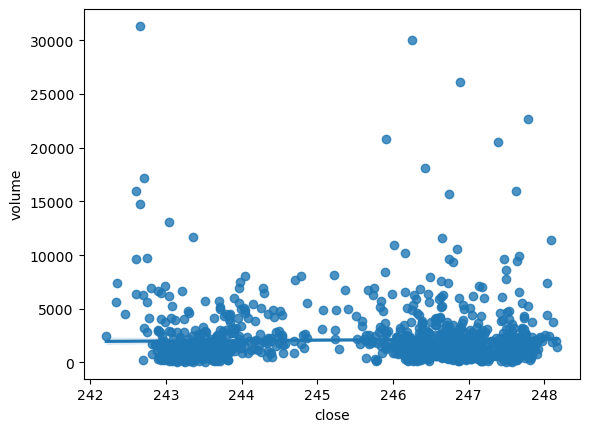

In [23]:
sns.regplot(x='close', y='volume', data=df)

In [34]:
def calculate_pearson_correlation(df, close, volume):

    if close not in df or volume not in df:
        raise ValueError(f"One or both columns '{close}' or '{volume}' do not exist in the DataFrame.")

    data = df[["close", "volume"]].dropna()

    return correlation


In [36]:
correlation = df["close"].corr(df["volume"])
print(correlation)

0.02618752400924061


# My Answer

### from the presented graph, we can assume that there is no real relation between the "close" and "volume" data. from observing the graph, specifically the regression plot, we see a flat line drawn across the chart between the 0-5000 mark on volume, which usually tends to signal that there is no relation between "close" and "volume" data. we can confirm this with the use of the Pearson Correlation Coefficient, or (r). from my Python function, I calculated the value of the graph which equaled 0.0262, which is extremely small and close to 0. If the line is flat, the correlation coefficient (r) between "volume" and "close" is likely close to 0, which indicates no linear relationship between the two variables. if we used the coefficient of determination, or (r2), the result would be 0.00068644, which is even closer to the 0 mark. these provided pieces of evidence prove that there is no correlation between "close" and "volume".